
[Dataset](https://drive.google.com/file/d/1wWsrN2Ep7x6lWqOXfr4rpKGYrJhWc8z7/view)

In [ ]:
import os
Root = "/content/drive/MyDrive/SPEECH Data set"
os.chdir(Root)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

Actor_01/  Actor_05/  Actor_09/  Actor_13/  Actor_17/  Actor_21/
Actor_02/  Actor_06/  Actor_10/  Actor_14/  Actor_18/  modelForPrediction1.sav
Actor_03/  Actor_07/  Actor_11/  Actor_15/  Actor_19/
Actor_04/  Actor_08/  Actor_12/  Actor_16/  Actor_20/


In [ ]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [ ]:
# Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust','neutral','angry','surprised']

In [ ]:
#Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[] 
    for file in glob.glob("/content/drive/MyDrive/SPEECH Data set/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [ ]:
#Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [ ]:
x_train

array([[-4.14871796e+02,  1.36216507e+01, -2.25643082e+01, ...,
         1.31305004e-03,  5.35304076e-04,  4.50629159e-04],
       [-4.53242981e+02,  3.28459778e+01, -1.65021343e+01, ...,
         8.45198985e-04,  6.65735279e-04,  4.27301362e-04],
       [-5.65807800e+02,  5.73824158e+01, -6.97590637e+00, ...,
         1.88067657e-04,  9.59694225e-05,  6.98998338e-05],
       ...,
       [-6.41548340e+02,  5.29163094e+01,  1.51340475e+01, ...,
         1.77019989e-04,  8.97201026e-05,  6.36034529e-05],
       [-6.91606018e+02,  6.10901642e+01,  1.26523800e+01, ...,
         8.28699285e-06,  4.08341111e-06,  1.50944322e-06],
       [-7.11446655e+02,  6.22730598e+01,  1.23670845e+01, ...,
         1.10971596e-05,  7.52397045e-06,  3.20591039e-06]])

In [ ]:
#Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(869, 290)


In [ ]:
#Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [ ]:
#Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [ ]:
#Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [ ]:
#Predict for the test set
import pandas as pd
df3=y_pred
df3=pd.DataFrame(model.predict(x_test))

In [ ]:
df3.head(10)

,0
0,disgust
1,calm
2,calm
3,surprised
4,surprised
5,angry
6,fearful
7,fearful
8,calm
9,disgust


In [ ]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 64.14%


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
f1_score(y_test, y_pred,average=None)

,0
0,0.752294
1,0.740741
2,0.547619
3,0.645833
4,0.492754
5,0.500000
6,0.641026


In [ ]:
import pandas as pd
df=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df.head(15)

,Actual,Predicted
0,happy,disgust
1,neutral,neutral
2,calm,calm
3,surprised,surprised
4,disgust,surprised
5,angry,angry
6,fearful,calm
7,fearful,fearful
8,calm,calm
9,angry,happy


In [ ]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction1.sav', 'wb') as f:
    pickle.dump(model,f)

In [ ]:
filename = 'modelForPrediction1.sav'
loaded_model = pickle.load(open(filename, 'rb')) # loading the model file from the storage

feature=extract_feature("//content/drive/MyDrive/SPEECH Data set/Actor_01/03-01-05-01-02-02-01.wav", mfcc=True, chroma=True, mel=True)

feature=feature.reshape(1,-1)

prediction=loaded_model.predict(feature)
prediction

array(['angry'], dtype='<U9')

In [ ]:
feature

array([[-5.26436646e+02,  4.00636520e+01, -3.63211870e+00,
         8.93725777e+00, -4.60757732e+00, -3.54207993e+00,
        -7.42745066e+00, -1.50939798e+01, -1.01635303e+01,
        -1.01764309e+00, -8.14028358e+00,  2.07646585e+00,
        -8.92190170e+00,  7.23796904e-01, -5.41962576e+00,
        -6.60462618e+00, -3.22181106e-01, -4.84624147e+00,
        -6.96535587e+00, -1.25628293e+00, -4.24170971e+00,
        -4.16995573e+00, -2.72106004e+00, -4.61768818e+00,
        -4.32355356e+00, -1.52835763e+00, -3.09510469e+00,
         2.57310063e-01, -1.98645902e+00,  1.03113675e+00,
        -3.44328403e+00, -1.20161176e+00, -3.41803394e-02,
         2.83532441e-01, -9.65636820e-02, -1.87545872e+00,
        -2.67884374e+00, -1.51988661e+00, -7.03379139e-02,
         1.29936576e+00,  5.99317491e-01,  6.71231270e-01,
         6.93971992e-01,  6.80098832e-01,  6.70053422e-01,
         6.57479644e-01,  6.59559965e-01,  7.00153172e-01,
         7.26785004e-01,  7.42775202e-01,  7.25220561e-0

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       angry       0.81      0.72      0.76        54
        calm       0.80      0.71      0.75        49
     disgust       0.66      0.49      0.56        43
     fearful       0.67      0.67      0.67        42
       happy       0.49      0.58      0.53        45
     neutral       0.63      0.63      0.63        19
   surprised       0.56      0.76      0.64        38

    accuracy                           0.66       290
   macro avg       0.66      0.65      0.65       290
weighted avg       0.67      0.66      0.66       290



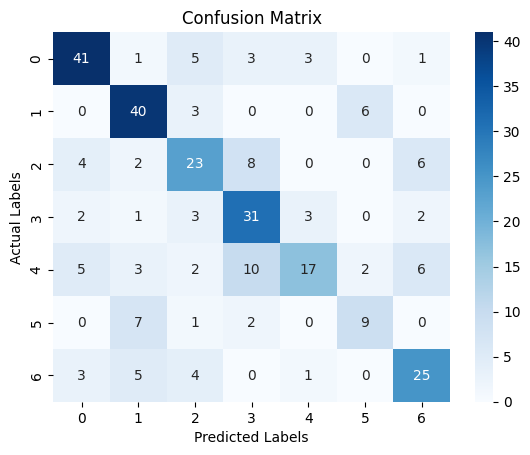

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


In [ ]:
from sklearn import metrics
clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
s=metrics.accuracy_score(y_test,pred)*100
print("svm=",s)

svm= 56.55172413793104
